In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
def clean_traffic(value):
    value = value.replace(",", "").replace("+", "").strip()
    return int(value)

data = pd.read_csv('./classification_output.csv')
df = data[['date','predicted_label','traffic']]
df['traffic_numeric'] = df['traffic'].apply(clean_traffic)

topic_stats = df.groupby('predicted_label')['traffic_numeric'].agg(['mean']).sort_values('mean',ascending=True)
topic_stats

C:\Users\alkrd\AppData\Local\Temp\ipykernel_25720\3540171687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['traffic_numeric'] = df['traffic'].apply(clean_traffic)


,mean
predicted_label,
accident,2000.000000
real estates,2000.000000
fashion,2000.000000
art,2600.000000
military,2600.000000
bussiness,2857.142857
religion,3285.714286
literature,3500.000000
tragedy,4025.641026


<Axes: xlabel='predicted_label'>

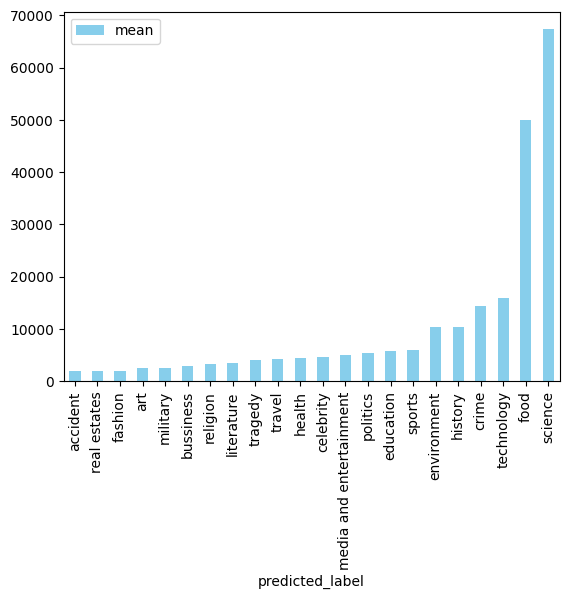

In [18]:
topic_stats.plot(kind='bar', color='skyblue')
# plt.xlabel('Category')
# plt.ylabel('Average Traffic')
# plt.title('Average Traffic by Category')
# plt.xticks(rotation=90)
# plt.show()

In [19]:
df

,date,predicted_label,traffic,traffic_numeric
0,2016-11-29,travel,"5,000+",5000
1,2016-11-29,sports,"5,000+",5000
2,2016-11-29,media and entertainment,"2,000+",2000
3,2016-11-29,bussiness,"2,000+",2000
4,2016-11-30,sports,"2,000+",2000
...,...,...,...,...
523,2017-05-03,tragedy,"2,000+",2000
524,2017-05-03,media and entertainment,"2,000+",2000
525,2017-05-04,sports,"5,000+",5000
526,2017-05-04,education,"2,000+",2000


C:\Users\alkrd\AppData\Local\Temp\ipykernel_25720\1766924012.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


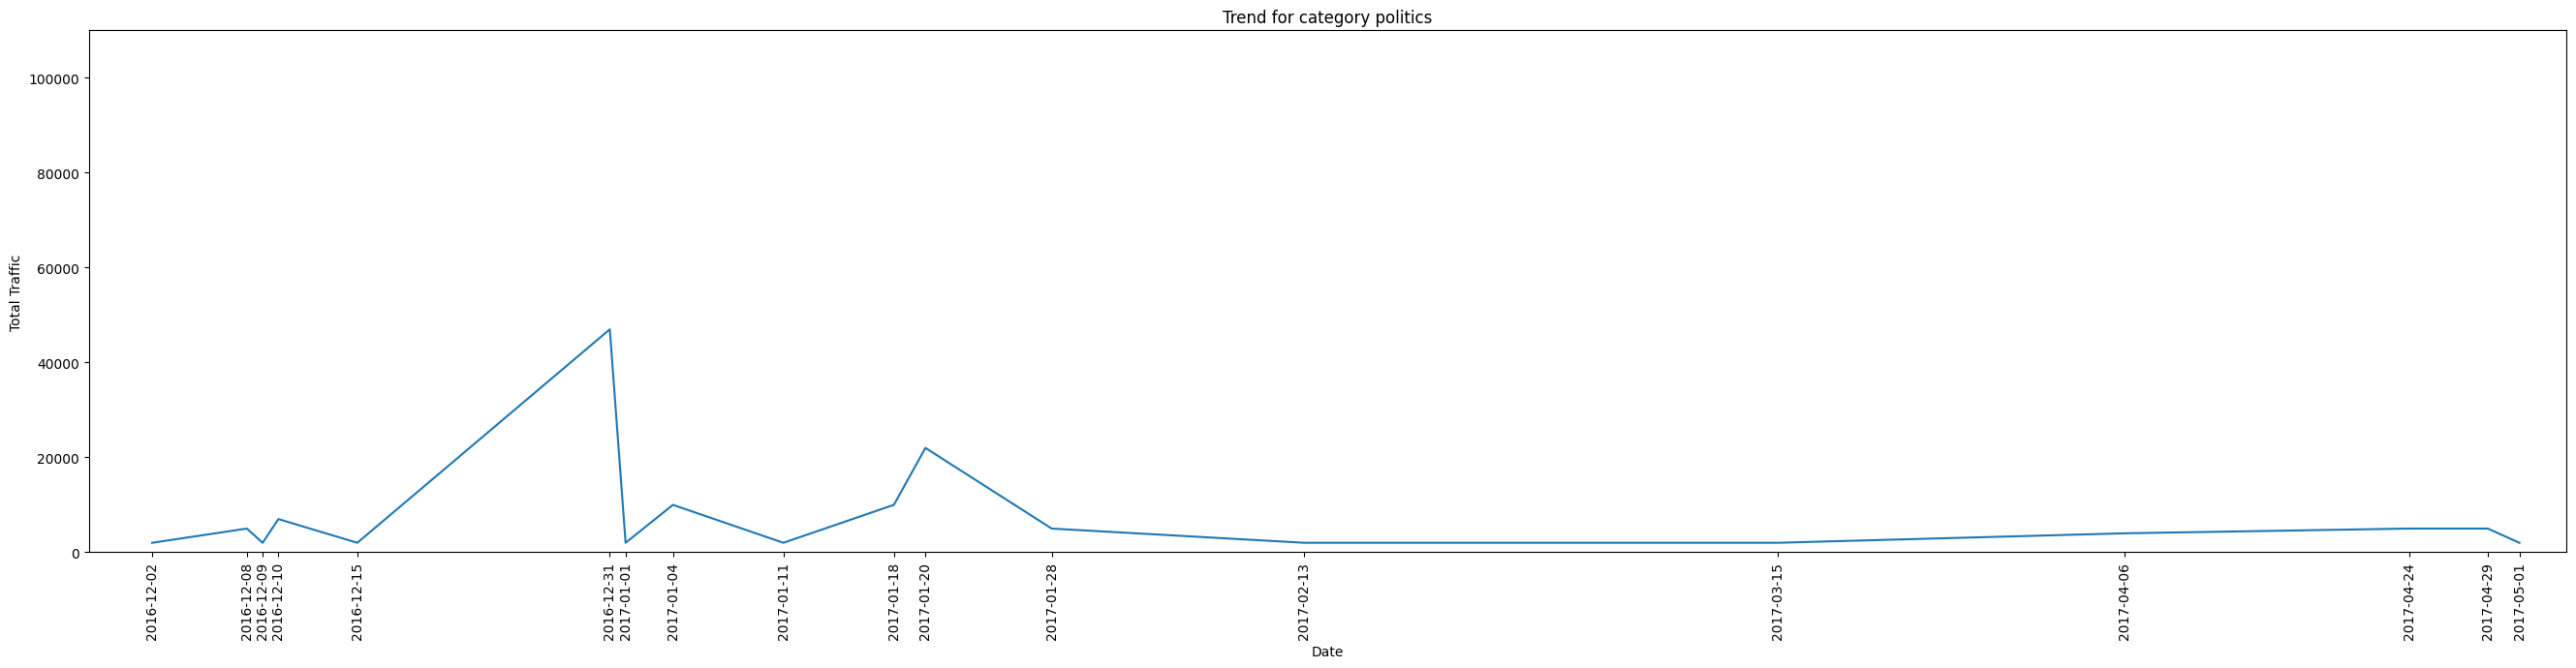

In [ ]:
df['date'] = pd.to_datetime(df['date'])
maxTraffic = df['traffic_numeric'].max()

category_time_distribution = df.groupby(['date', 'predicted_label'])['traffic_numeric'].sum().reset_index(name='total_traffic')
specific_category = "politics"
specific_category_data = category_time_distribution[category_time_distribution['predicted_label'] == specific_category]

plt.figure(figsize=(33, 7))
sns.lineplot(data=specific_category_data, x='date', y='total_traffic')
plt.title(f"Trend for category {specific_category}")
plt.xlabel("Date")
plt.ylabel("Total Traffic")
plt.xticks(specific_category_data['date'], rotation=90)

plt.ylim(0, maxTraffic+10000)

start_date = pd.to_datetime('2016-11-28')
end_date = pd.to_datetime('2017-05-04')

plt.xlim(start_date, end_date)

plt.show()